<font face="Times New Roman" size=5>
<div dir=rtl align="center">

<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Introduction to Machine Learning
</font>

<hr/>
<font color="#80a080" size=5>
Assignment 2: Optimization  
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<hr>
</div></font>

> - Full Name: **Mahdi Mansouri**
> - Student ID: **402104499**

# **Overview**

In this homework we're going to explores **optimization algorithms**, focusing on **Gradient Descent (GD) and AdaGrad**. The goal is to understand how these methods work, how they perform on different functions, and how adaptive learning rate strategies (like AdaGrad) improve optimization efficiency.  

We will implement these algorithms from scratch and define the functions we want to optimization over.  

To compare their performance, we optimize **three different functions**:  
1. **A Three-body potential function**
2. **The Rosenbrock function**
3. **An Anisotropic Quadratic Function**



<h3>You should complete the <code>TODO</code> parts</h3>

# **Libraries**

In [3]:
# The necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D

# **Functions**

Before implementing optimization algorithms, we define three functions that exhibit different properties relevant to optimization. Each function represents a unique type of problem, making them ideal for testing gradient-based methods.

## **1. Three-Body Potential Function**  

We now consider a **three-body problem**, where two bodies are fixed at positions **(0,1)** and **(0,-1)**, while the third body is free to move in the plane. The potential function for this system is:  

$$
\varphi(x) = \sum_{i} \left( \frac{1}{\|x - p_i\|^2} - \log(\|x - p_i\|) \right) + \|x\|^2
$$

where:
- $ x $ represents the position of the free-moving body.
- $ p_1 = (0,1) $ and $ p_2 = (0,-1) $ are the **fixed** body positions.
- The first sum accounts for interactions between the moving body and the fixed bodies.

### **Breakdown of the Function Components:**
1. **Repulsion term:**  
   $$
   \sum_{i} \frac{1}{\|x - p_i\|^2}
   $$
   This term causes the free-moving body to be repelled from the fixed bodies when it gets too close.  

2. **Attraction term:**  
   $$
   -\sum_{i} \log(\|x - p_i\|)
   $$
   This introduces a weak attractive force, preventing the free body from escaping to infinity.  

3. **Regularization term:**  
   $$
   \|x\|^2
   $$
   This keeps the free-moving body from drifting arbitrarily far from the origin by penalizing large distances.  
---

## **2. Rosenbrock Function**  

$$
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
$$

The **Rosenbrock function** is a well-known benchmark for optimization algorithms. It defines a curved, narrow valley that leads to the global minimum at $ (1,1) $. The function is widely used to test how optimizers handle **non-convex landscapes** where the optimal path to the minimum is not straightforward.

The structure of the function causes gradual changes in one direction and steeper changes in another, making it an interesting test case for optimization procedures.

---

## **3. Anisotropic Quadratic Function**  

$$
g(x, y) = 100x^2 + y^2
$$

This function is a **quadratic function with different scaling in each direction**. The coefficient of $ x^2 $ is much larger than that of $ y^2 $, meaning the function changes much more rapidly along the $ x $-axis than along the $ y $-axis.

Such anisotropic functions are common in machine learning and optimization, where different parameters affect the objective function at different rates. This function is useful for testing how optimization methods adapt to directional differences in scale.


In [169]:
# --- Function 1: Many-Body Potential Function ---
def potential_func(x, n_points=[(0,1),(0,-1)], dim=2):
    phi_x=0.0
    x=np.array(x)
    for p in n_points:
        phi_x+=1/sum([np.float64((i-j)**2) for i,j in zip(x,p)]) - np.log(np.sqrt((sum([(i-j)**2 for i,j in zip(x,p)]))))
    phi_x+=sum([i**2 for i in x])
    return phi_x

def potential_grad(x, n_points=[[0,1], [0,-1]], dim=2):
    x = np.array(x, dtype=float)
    grad = np.zeros_like(x)
    for p in n_points:
        p = np.array(p)
        diff = x - p
        distance_sq = np.sum(diff ** 2)
        grad += (-2 / (distance_sq ** 2) + (-1 / distance_sq)) * diff
    grad += 2 * x
    return grad 

# --- Function 2: Rosenbrock Function ---
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosenbrock_grad(x):
    df_dx0 = -2*(1-x[0])-400*x[0]*(x[1]-x[0]**2)
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1]) 

# --- Function 3: Anisotropic Quadratic Function ---
def anisotropic_quadratic(x):
    return 100 * x[0]**2 + x[1]**2

def anisotropic_quadratic_grad(x):
    return np.array([200 * x[0], 2 * x[1]]) 

In the following section we will plot the functions to gain a sense of what they look like and how should the optimization find the minimum.

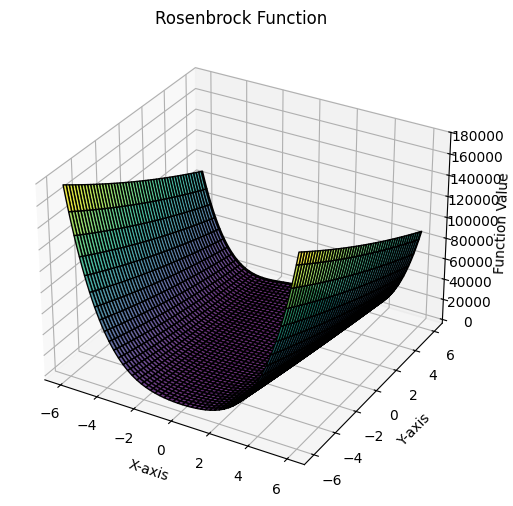

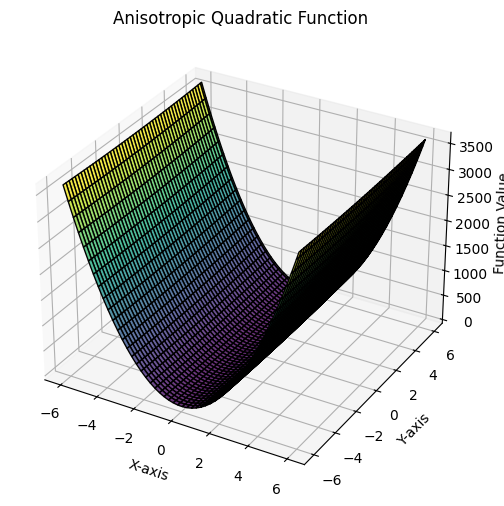

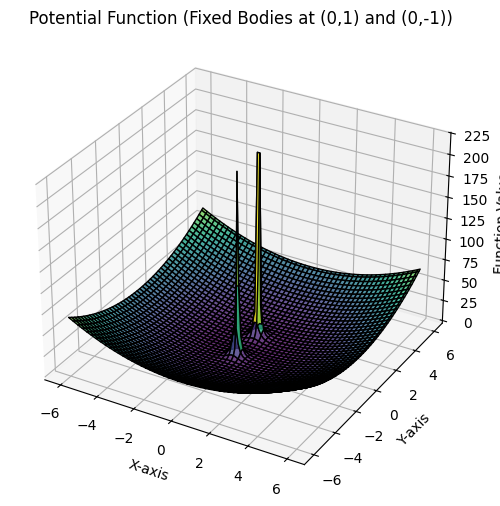

In [170]:
def plot_function(func, x_range=(-6, 6), y_range=(-6, 6), resolution=100, title="Function Surface"):

    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    # TODO: compute function values
    Z = func((X,Y))
    # Create 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='k', alpha=0.8)

    # Labels and title
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Function Value")
    ax.set_title(title)
    plt.show()


# Plot Rosenbrock function
plot_function(rosenbrock, title="Rosenbrock Function")

# Plot Anisotropic Quadratic function
plot_function(anisotropic_quadratic, title="Anisotropic Quadratic Function")

# Plot Potential Function
plot_function(potential_func, title="Potential Function (Fixed Bodies at (0,1) and (0,-1))")

# **Gradient Descent (GD) Algorithm**  


## **Gradient Descent without Momentum**  

Gradient Descent (GD) is one of the most fundamental optimization algorithms used to minimize functions by iteratively updating parameters in the direction of **steepest descent**. The method is widely applied in machine learning, physics simulations, and numerical optimization due to its simplicity and efficiency.  

The algorithm works by **moving in the opposite direction of the gradient**, which points toward the steepest increase in function value. By taking small steps in the negative gradient direction, the algorithm gradually approaches a local (or global) minimum.  

Mathematically, the update rule for each iteration is given by:  

$$
x^{(t+1)} = x^{(t)} - \eta \nabla f(x^{(t)})
$$

where:  
- $ x^{(t)} $ is the current parameter vector at iteration $ t $.  
- $ \eta $ (learning rate) controls the step size.  
- $ \nabla f(x^{(t)}) $ is the gradient of the function at $ x^{(t)} $.  


## **Gradient Descent with Momentum**  

Standard GD can struggle with slow convergence, especially in **ravines** where the gradient changes rapidly in different directions. **Momentum** helps by smoothing updates, allowing the algorithm to **accelerate in the right direction** while dampening oscillations.

The **momentum-based update rule** is:

$$
v^{(t+1)} = \beta v^{(t)} - \eta \nabla f(x^{(t)})
$$

$$
x^{(t+1)} = x^{(t)} + v^{(t+1)}
$$

where:  
- $ v^{(t)} $ is the velocity term, which accumulates past gradients.  
- $ \beta $ (momentum coefficient) determines how much of the past velocity is retained.  
- $ \eta $ is the learning rate.  

Momentum **helps escape saddle points and speeds up convergence** by maintaining inertia in promising directions, reducing zig-zag behavior in high-curvature regions.

In [171]:


class GD:
    def __init__(self, func, grad, initial_point, lr, max_iter, tol, beta=0.9, with_momentum=False):
        self.func = func
        self.grad = grad
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.beta = beta
        self.with_momentum = with_momentum
        self.converged = False
        
        self.x = np.array(initial_point, dtype=float)
        
       
        self.history = [self.x.copy()] 

    def optimize(self):
        start_time = time.time()
        v = np.zeros_like(self.x)  
        for _ in range(self.max_iter):
            gradient = self.grad(self.x)
            
            if np.linalg.norm(gradient) < self.tol:
                self.converged = True
                break
            
            if self.with_momentum:
                v = self.beta * v + -self.lr * gradient
            else:
                v = -self.lr * gradient
            self.x += v
           
            self.history.append(self.x.copy())
        
        self.runtime = time.time() - start_time
        return self.x

# **Optimization with GD without momentum**

In this section, we perform the optimization on the three functions and check whether they converge or not.  

In [172]:
# Potential Function Optimization

# TODO: random initial point
import random


x0_potential = np.random.uniform(-6,6,2)

# TODO: setup the optimizer
gd_potential = GD(
    func= potential_func,
    grad=potential_grad ,
    initial_point=x0_potential ,
    lr=0.05 ,
    max_iter=10000 ,
    tol=1e-3 ,
    with_momentum=False,
)


gd_potential.optimize()

if gd_potential.converged:
    print(f"Optimization converged at iteration {len(gd_potential.history)} and in {gd_potential.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_potential.max_iter} iterations")

Optimization converged at iteration 83 and in 0.0023 seconds.


In [210]:
# Rosenbrock Function Optimization

# TODO: random initial point
x0_rosenbrock = np.random.uniform(-6,6,2)
# TODO: setup the optimizer
gd_rosenbrock = GD(
    func=rosenbrock ,
    grad=rosenbrock_grad ,
    initial_point=x0_rosenbrock,
    lr=5e-4,
    max_iter=1000000 ,
    tol=1e-3 ,
    with_momentum=False,
    beta=0.90
)
gd_rosenbrock.optimize()

if gd_rosenbrock.converged:
    print(f"Optimization converged at iteration {len(gd_rosenbrock.history)} and in {gd_rosenbrock.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_rosenbrock.max_iter} iterations")

Optimization converged at iteration 28505 and in 0.0897 seconds.


In [203]:
# Anisotropic Quadratic Function Optimization

# TODO: random initial point
x0_anisotropic = np.random.uniform(-6,6,2)

# TODO: setup the optimizer
gd_anisotropic = GD(
    func=anisotropic_quadratic ,
    grad=anisotropic_quadratic_grad ,
    initial_point=x0_anisotropic ,
    lr=0.005 ,
    max_iter=2000 ,
    tol=1e-3 ,
    with_momentum=False
)


gd_anisotropic.optimize()

if gd_anisotropic.converged:
    print(f"Optimization converged at iteration {len(gd_anisotropic.history)} and in {gd_anisotropic.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_anisotropic.max_iter} iterations")

Optimization converged at iteration 530 and in 0.0037 seconds.


# **Optimization with GD with momentum**

In this section, we perform the optimization on the three functions and check whether they converge or not. Note that the initial points are chosen to be the same as the ones used in **GD optimization without momentum**.

In [211]:
# Potential Function Optimization

# TODO: setup the optimizer
gd_potential_with_momentum = GD(
    func=potential_func ,
    grad=potential_grad ,
    initial_point=x0_potential ,
    lr=0.05 ,
    max_iter=2000 ,
    tol=1e-3 ,
    with_momentum= True
)


gd_potential_with_momentum.optimize()

if gd_potential_with_momentum.converged:
    print(f"Optimization converged at iteration {len(gd_potential_with_momentum.history)} and in {gd_potential_with_momentum.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_potential_with_momentum.max_iter} iterations")

Optimization converged at iteration 158 and in 0.0041 seconds.


In [212]:
# Rosenbrock Function Optimization

# TODO: setup the optimizer
gd_rosenbrock_with_momentum = GD(
    func=rosenbrock ,
    grad=rosenbrock_grad ,
    initial_point=x0_rosenbrock ,
    lr=5e-4 ,
    max_iter=40000 ,
    tol=1e-3 ,
    with_momentum= True
)


gd_rosenbrock_with_momentum.optimize()

if gd_rosenbrock_with_momentum.converged:
    print(f"Optimization converged at iteration {len(gd_rosenbrock_with_momentum.history)} and in {gd_rosenbrock_with_momentum.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_rosenbrock_with_momentum.max_iter} iterations")

Optimization converged at iteration 2784 and in 0.0157 seconds.


In [213]:
# Anisotropic Quadratic Function Optimization

# TODO: setup the optimizer
gd_anisotropic_with_momentum = GD(
    func=anisotropic_quadratic ,
    grad=anisotropic_quadratic_grad,
    initial_point=x0_anisotropic ,
    lr=0.005 ,
    max_iter=2000 ,
    tol=1e-3 ,
    with_momentum= True
)


gd_anisotropic_with_momentum.optimize()

if gd_anisotropic_with_momentum.converged:
    print(f"Optimization converged at iteration {len(gd_anisotropic_with_momentum.history)} and in {gd_anisotropic_with_momentum.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {gd_anisotropic_with_momentum.max_iter} iterations")

Optimization converged at iteration 180 and in 0.0009 seconds.


# **AdaGrad Algorithm**

Gradient Descent (GD) uses a fixed learning rate for all parameters, which can lead to inefficiency when gradients vary across dimensions. Some directions may require larger steps, while others need smaller adjustments. Newton’s method addresses this by using the Hessian matrix $ H $ to rescale updates:

$$
x_{t+1} = x_t - H^{-1} \nabla f(x_t)
$$

This ensures faster convergence, but computing $ H^{-1} $ is expensive.

## Gradient Whitening

Gradient Whitening transforms the gradients to have an identity covariance matrix, effectively "whitening" them. This process ensures that the gradients are uncorrelated and have unit variance, which can improve the convergence rate of gradient-based optimization algorithms.

The update rule for gradient whitening can be expressed as:

$$
x_{t+1} = x_t - \eta W_t \nabla f(x_t)
$$

where:
- $ x_t $ is the current parameter vector at iteration $ t $.
- $ \eta $ is the initial learning rate.
- $ W_t $ is the whitening matrix that transforms the gradients.

The whitening matrix $ W_t $ is computed such that:

$$
W_t \text{Cov}(\nabla f(x_t)) W_t^T = I
$$

where $ \text{Cov}(\nabla f(x_t)) $ is the covariance matrix of the gradients, and $ I $ is the identity matrix.

### Benefits of Gradient Whitening

- **Frequent updates** → Smaller steps (prevents overshooting).
- **Rare updates** → Larger steps (ensures exploration).

Gradient whitening dynamically adjusts the step sizes to the local geometry of the objective function, similar to how AdaGrad adapts step sizes. However, computing and applying the whitening matrix can be computationally intensive, especially for high-dimensional problems.

## AdaGrad

AdaGrad accumulates gradient information in a preconditioning matrix (Note that $ G_t $ is not an approximation of $ H $, but serves as an approximation of $W_t$):

$$
G_t = G_{t-1} + \nabla f(x_t) \nabla f(x_t)^T
$$

The update rule becomes:

$$
x_{t+1} = x_t - \eta G_t^{-\frac{1}{2}} \nabla f(x_t)
$$

where:
- $ x_t $ is the current parameter vector at iteration $ t $.
- $ \eta $ is the initial learning rate.

Here, $ G_t^{-\frac{1}{2}} $ acts like an adaptive metric, adjusting the step size differently in each direction. This means:
- **Frequent updates** → Smaller steps (prevents overshooting).
- **Rare updates** → Larger steps (ensures exploration).

By reweighting gradients dynamically, AdaGrad behaves like a first-order approximation of Newton’s method, adapting step sizes to the local geometry of the objective function. However, storing $ G_t $ requires $ O(n^2) $ memory and inverting it costs $ O(n^3) $, making this approach impractical for high-dimensional problems.

In [214]:



class AdaGrad:
    def __init__(self, func, grad, initial_point, lr, max_iter, tol):
        self.func = func
        self.grad = grad
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol # Tolerance for the gradient, values smaller of which indicate convergence
        self.runtime = None # Stores optimization runtime

        self.converged = False

        # TODO: setup the parametrs
        self.x = initial_point

        # TODO: setup the history of parametrs
        self.history = [self.x.copy()]

        # TODO: setup the preconditioning matrix
        self.G = np.zeros(shape=(len(grad(self.x))))


    def optimize(self):
        # TODO: Implement the GD algorithm. You should handle the case where optimization diverges
        start_time = time.time()
        for _ in range(self.max_iter):
            grad=self.grad(self.x)
            if np.linalg.norm(grad) < self.tol:
                self.converged = True
                break
            self.G=self.G + grad**2
            self.x=self.x - ( self.lr / np.sqrt(self.G) ) * grad
            self.history.append(self.x.copy())


        self.runtime = time.time() - start_time
        return self.x

# **Optimization with AdaGrad**

In this section, we perform the optimization with AdaGrad on the three functions and check whether they converge or not. Note that the initial points are chosen to be the same as the ones used in **GD optimization without momentum**.

In [253]:
# Potential Function Optimization

adagrad_potential = AdaGrad(
    func=potential_func ,
    grad=potential_grad ,
    initial_point=x0_potential ,
    lr=1.5,
    max_iter=2000 ,
    tol=1e-3
)

adagrad_potential.optimize()

if adagrad_potential.converged:
    print(f"Optimization converged at iteration {len(adagrad_potential.history)} and in {adagrad_potential.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {adagrad_potential.max_iter} iterations")

Optimization converged at iteration 40 and in 0.0013 seconds.


In [252]:
# Rosenbrock Function Optimization

adagrad_rosenbrock = AdaGrad(
    func=rosenbrock ,
    grad=rosenbrock_grad ,
    initial_point=x0_rosenbrock ,
    lr=0.07 ,
    max_iter=400000,
    tol=1e-3
)

adagrad_rosenbrock.optimize()

if adagrad_rosenbrock.converged:
    print(f"Optimization converged at iteration {len(adagrad_rosenbrock.history)} and in {adagrad_rosenbrock.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {adagrad_rosenbrock.max_iter} iterations")

Optimization converged at iteration 5789 and in 0.0324 seconds.


In [250]:
# Anisotropic Quadratic Function Optimization

adagrad_anisotropic = AdaGrad(
    func=anisotropic_quadratic,
    grad=anisotropic_quadratic_grad,
    initial_point=x0_anisotropic ,
    lr=5 ,
    max_iter=2000 ,
    tol=1e-3
)

adagrad_anisotropic.optimize()

if adagrad_anisotropic.converged:
    print(f"Optimization converged at iteration {len(adagrad_anisotropic.history)} and in {adagrad_anisotropic.runtime:.4f} seconds.")

else:
    print(f"Optimization diverged or couldn't converge in {adagrad_anisotropic.max_iter} iterations")

Optimization converged at iteration 5 and in 0.0001 seconds.


# **Ploting Convergence**

In [254]:
def plot_convergence(history, func, title="Optimization Trajectory"):

    history = np.array(history)

    # Extract x and y coordinates from history
    x_vals, y_vals = history[:, 0], history[:, 1]

    # Define contour plot range
    x_min, x_max = min(x_vals) - 8, max(x_vals) + 8
    y_min, y_max = min(y_vals) - 8, max(y_vals) + 8

    # TODO: create grid for contour plot
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))

    # TODO: compute function values
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func([X[i, j], Y[i, j]])  

    # Plot contour map
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, levels=20, cmap="viridis")
    plt.colorbar(contour)

    # Overlay optimization path
    plt.plot(x_vals, y_vals, "r-o", markersize=4, linewidth=2, label="Optimization Path")

    # Labels and title
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)

    plt.show()

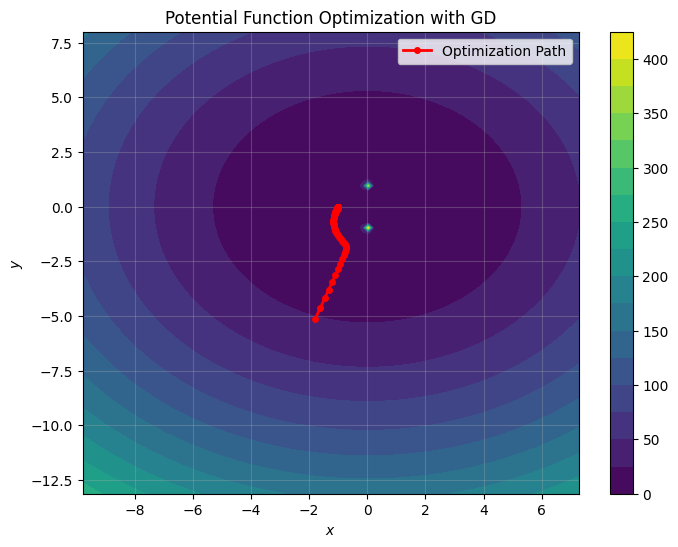

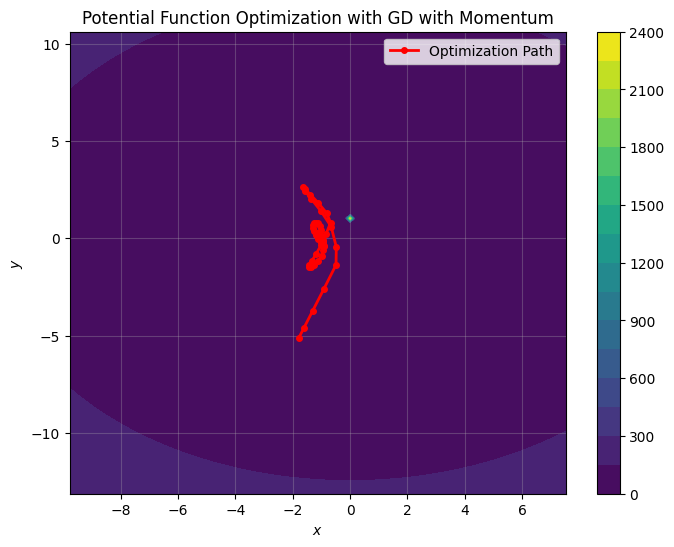

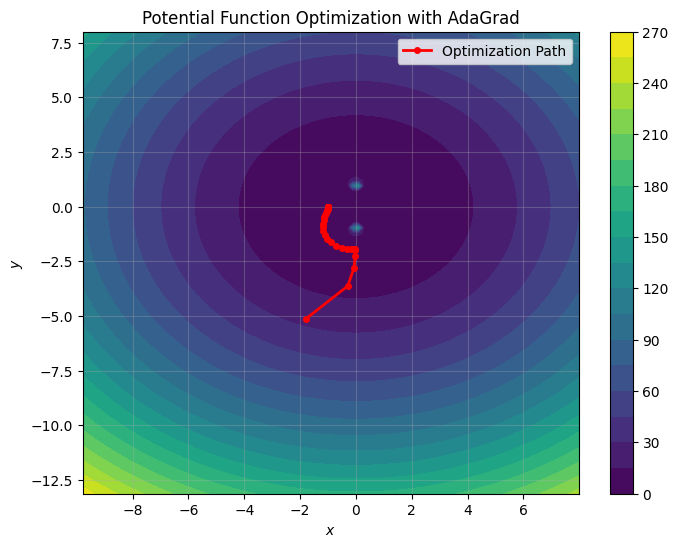

In [255]:
# Plot for Potential
plot_convergence(gd_potential.history, potential_func, title="Potential Function Optimization with GD")
plot_convergence(gd_potential_with_momentum.history, potential_func, title="Potential Function Optimization with GD with Momentum")
plot_convergence(adagrad_potential.history, potential_func, title="Potential Function Optimization with AdaGrad")

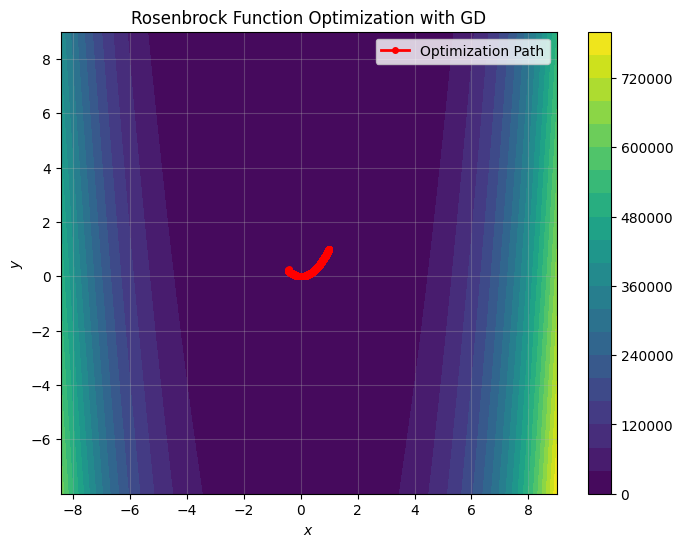

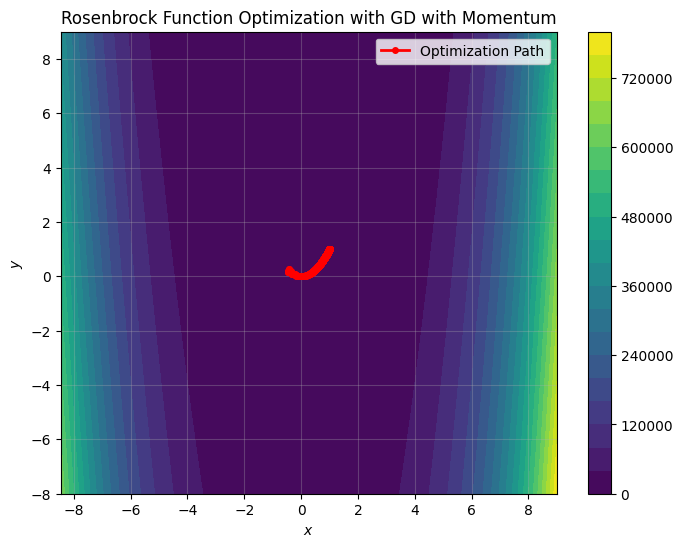

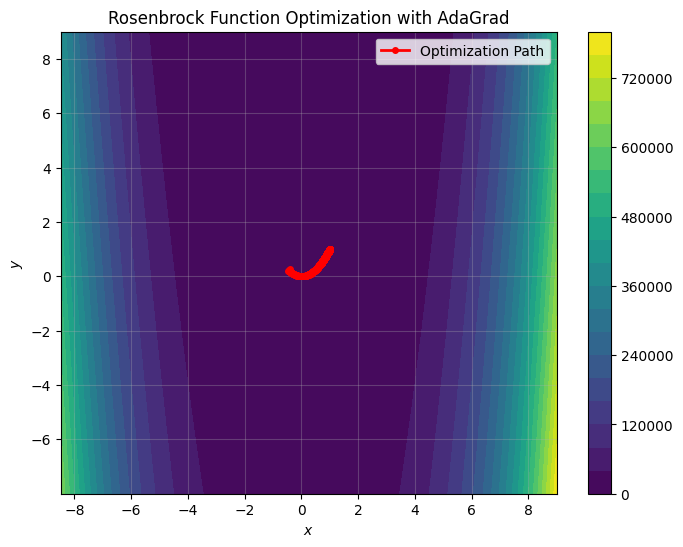

In [256]:
# Plot for Rosenbrock
plot_convergence(gd_rosenbrock.history, rosenbrock, title="Rosenbrock Function Optimization with GD")
plot_convergence(gd_rosenbrock_with_momentum.history, rosenbrock, title="Rosenbrock Function Optimization with GD with Momentum")
plot_convergence(adagrad_rosenbrock.history, rosenbrock, title="Rosenbrock Function Optimization with AdaGrad")

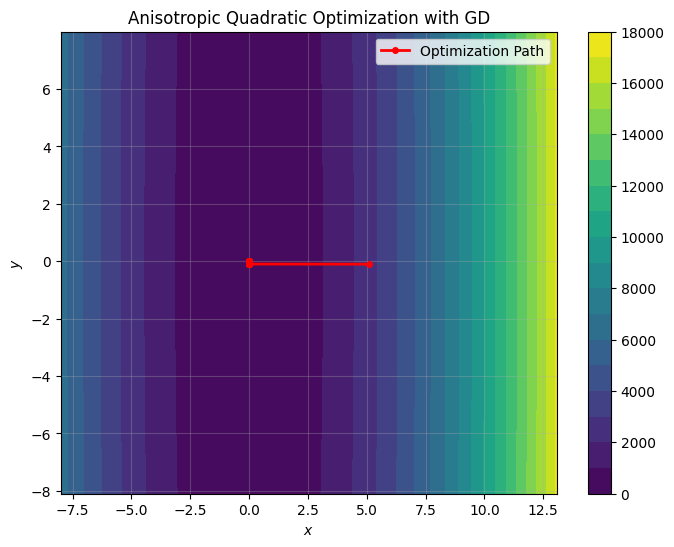

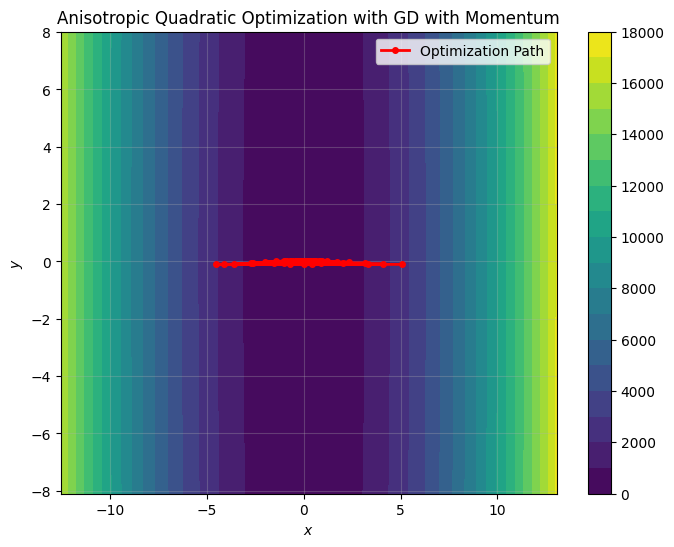

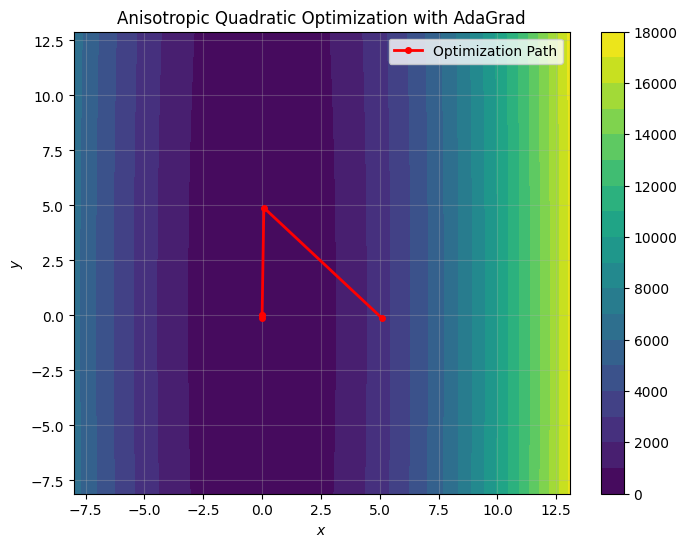

In [258]:
# Plot for Anisotropic Quadratic
plot_convergence(gd_anisotropic.history, anisotropic_quadratic, title="Anisotropic Quadratic Optimization with GD")
plot_convergence(gd_anisotropic_with_momentum.history, anisotropic_quadratic, title="Anisotropic Quadratic Optimization with GD with Momentum")
plot_convergence(adagrad_anisotropic.history, anisotropic_quadratic, title="Anisotropic Quadratic Optimization with AdaGrad")

 **Question**

 Explain and interpret the results you got (plots, number of iterations and runtimes).


 **[Answer]**
Comparing the momentum on or off, for potential function it performed worse when on because the idial path for gradient descent algorithm is something that fluctuates a lot, so it momentum off will outperform and executes in lower iterations. For Rosenbrock and Anisotropic, the momentum algorithm is much better due to the charachteristics of the functions.

AdaGrad algorithm needs higher learning rates, for all functions and when we are increasing it, it will perform really nice with much less iterations. Except for Rosenbrock function.